# Lab 4: Polynomial Regression

In [1]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import data

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 0: Import  datasets

1. Import training ('data/lab4-400-training.csv') and testing ('data/lab4-100-testing.csv') datasets into separate matrices. Use [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) or your data class.
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.
3. Print the first 5 rows of the training and testing datasets.

In [2]:
A = data.Data(filepath = 'data/lab4-400-training.csv')
AT = data.Data(filepath = 'data/lab4-100-testing.csv')

print(A.head())
print(A.head())

print('''
--------------------------------------
Your results should look like
--------------------------------------
A first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
AT first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]

--------------------------------------
Your results should look like
--------------------------------------
A first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
AT first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]



## Task 1. 3 dimensional polynomial regression

### 1a. Make a polynomial matrices

1. Make a polynomial matrices for the training dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), Ap, with the same number of rows as the training dataset and 4 columns
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), ATp, with the same number of rows as the test dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
1. Make a polynomial matrix to graph the prediction line
    1. For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), line_x, from the minimum(training x value)-.1  value to the maximum(training x value)+.1 value with 100 steps
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), lineM_x, with 100 rows and 4 columns
    5. Like in the step above, update the second column to be the linspace, the third column to be the linspace squared, and the fourth column to be the linspace cubed.
    1. Print the first 5 rows of the matrix


In [3]:
N = A.get_num_samples()
Ap = np.ones([N, 4])
x = A.select_data('x')
y = A.select_data('y1')
Ap[:, 1] = x.reshape(N, )
Ap[:, 2] = np.square(x.reshape(N, ))
Ap[:, 3] = np.power(x.reshape(N, ), 3)
print(Ap[:5,:])

NT = AT.get_num_samples()
ATp = np.ones([NT, 4])
xT = AT.select_data('x')
yT = AT.select_data('y1')
ATp[:, 1] = xT.reshape(NT, )
ATp[:, 2] = np.square(xT.reshape(NT, ))
ATp[:, 3] = np.power(xT.reshape(NT, ), 3)
print(ATp[:5,:])

line_x = np.linspace(np.min(x)-.1, np.max(x)+.1, num=100)
lineM_x = np.ones([100, 4])
lineM_x[:, 1] = line_x
lineM_x[:, 2] = np.square(line_x)
lineM_x[:, 3] = np.power(line_x, 3)
print(lineM_x[:5,:])

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -1.00188  1.00377 -1.00566]
 [ 1.      -0.98052  0.96142 -0.9427 ]
 [ 1.      -0.95916  0.91999 -0.88242]
 [ 1.      -0.9378   0.87947 -0.82477]
 [ 1.      -0.91644  0.83987 -0.76969]]
''')

[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
[[ 1.      -1.00188  1.00377 -1.00566]
 [ 1.      -0.98052  0.96142 -0.9427 ]
 [ 1.      -0.95916  0.91999 -0.88242]
 [ 1.      -0.9378   0.87947 -0.82477]
 [ 1.      -0.91644  0.83987 -0.76969]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.799

### 1b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable y1. 
2.  Calculate and print the $R^2$ value.
    

In [4]:
c, res, rnk, s = scipy.linalg.lstsq(Ap, y)
# c = c.reshape(c.shape[0],)
res = np.squeeze(res)
print('c: '+str(c))
print("residuals: " + str(res))
print("rank: " + str(rnk))

y_mean = np.sum(y)/N

# Find the residues between y and y_mean
mean_res = y - y_mean

# Compute error of model over mean
E = np.sum(res)

# Compute error of data over mean
S = np.sum(np.square(mean_res))

# Compute R^2
R2 = 1 - E/S

print('r-squared: '+str(R2))

print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')

c: [[-0.15511]
 [-0.96979]
 [-0.24675]
 [ 1.61541]]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 1c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply ATp with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it for each dependent variable.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression for the test dataset 

2. Print the $R^2$ for the test dataset

In [5]:
y_pred = ATp @ c

y_meanT = np.sum(yT)/NT

# Find the residues between y and y_mean
mean_resT = yT - y_meanT

# Calculate resT
resT = yT - y_pred

# Compute error of model over mean
ET = np.sum(np.square(resT))

# Compute error of data over mean
ST = np.sum(np.square(mean_resT))

# Compute R^2
R2T = 1 - ET/ST

print('r2 test: '+str(R2T))

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

r2 test: 0.4431027176546438

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### 1d. Graph Results
2. In one graph
    1. Graph the training data as a scatter plot.
    1. Graph the test dataset as a scatter plot.
    1. Graph the prediction line with line_x as the dependent variable and multiplying lineM_x with the weights for the independent variable.
    1. Include a title (with the two $R^2$ values), axis labels, and a legend

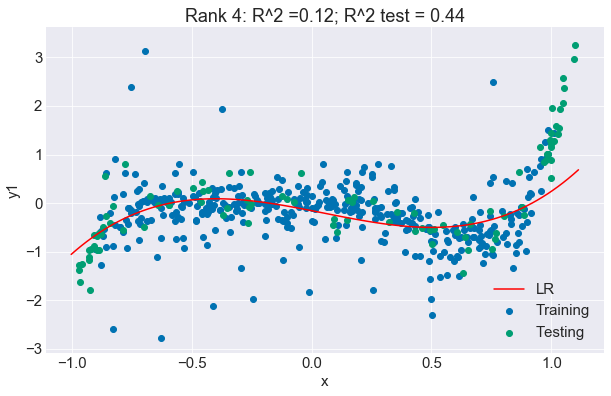

In [6]:
plt.scatter(x, y, label = 'Training')
plt.scatter(xT, yT, label = 'Testing')
ind = lineM_x @ c
plt.plot(line_x, ind, c='red', label = 'LR')
plt.legend()
plt.title("Rank 4: R^2 =" + str(round(R2, 2)) + "; R^2 test = " + str(round(R2T, 2)))
plt.xlabel('x')
plt.ylabel('y1')
plt.show()

## Task 2: Explore different polynomial degrees

Using the above code as a starting out place calculate the polynomial regression for the datasets with different polynomial degrees

### 2a.  Make 3 polynomial matrices: 1 for the training dataset, 1 for the test dataset and 1 for the prediction line
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), Ap, with the same number of rows as the training dataset and 10 columns
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), ATp, with the same number of rows as the testing dataset and 10 columns
1. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), lineM_x, with the same number of rows as line_x and 10 columns
1. For each matrix update the second column to be the linspace, the third column to be the linspace squared, and the fourth column to be the linspace cubed, and so on to the 10th column 
1. Print the first row of each matrix


In [7]:
Ap = np.ones([N, 10])
ATp = np.ones([NT, 10])
lineM_x = np.ones([100, 10])

x = A.select_data('x')
y = A.select_data('y1')
xT = AT.select_data('x')
yT = AT.select_data('y1')
N = A.get_num_samples()
NT = AT.get_num_samples()

for i in np.arange(1,10):
    Ap[:, i] = np.power(x.reshape(N, ), i)
    ATp[:, i] = np.power(xT.reshape(NT, ), i)
    lineM_x[:, i] = np.power(line_x, i)

print(Ap[:1,:])
print(ATp[:1,:])
print(lineM_x[:1,:])

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first row
[[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156 0.2596 ]]
ATp first row
[[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271 0.50782 -0.46658]]
lineM_x first row
[[ 1.      -1.00188  1.00377 -1.00566  1.00755 -1.00945  1.01135 -1.01325 1.01516 -1.01707]]
''')

[[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156
  0.2596 ]]
[[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271
   0.50782 -0.46658]]
[[ 1.      -1.00188  1.00377 -1.00566  1.00755 -1.00945  1.01135 -1.01325
   1.01516 -1.01707]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first row
[[1.      0.86084 0.74104 0.63792 0.54915 0.47273 0.40694 0.35031 0.30156 0.2596 ]]
ATp first row
[[ 1.      -0.91878  0.84417 -0.77561  0.71261 -0.65474  0.60156 -0.55271 0.50782 -0.46658]]
lineM_x first row
[[ 1.      -1.00188  1.00377 -1.00566  1.00755 -1.00945  1.01135 -1.01325 1.01516 -1.01707]]



### 2b. Calculate multiple dimensional polynomial regression

1.  Calculate the polynomial regression for 1st degree through 10th degree
    1.  Using scipy's [linalg.lstsq]() to calculate the weights, residuals and rank. 
    2.  Calculate and print the $R^2$ value using the residual.
    2.  Calculate the $R^2$ for the linear regressions ability predict the test dataset.
        1. Multiply ATp with the weights to get the predicted values and calculate the $R^2$ value
    1. Add to the plot the prediction line with line_x as the dependent variable and multiplying lineM_x with the weights as the independent variable.  Include the rank, $R^2$ value for the training data and the test data in the label for the line.
2. Graph the results (all in one plot)
    1. Graph the training data as a scatter plot.
    1. Graph the test dataset as a scatter plot.
    1. Include a title, axis labels, and a legend.
    1. Draw the legend outside of the plot using the parameter bbox_to_anchor=(1.01, 1)


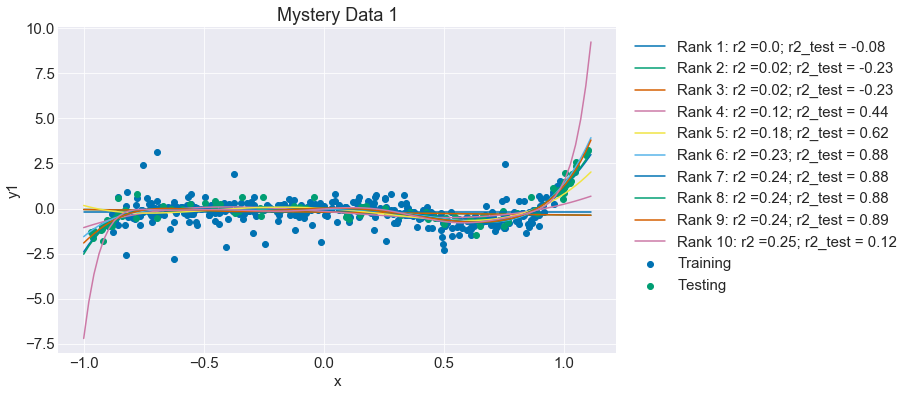

In [8]:
# Compute error of model over mean
y_mean = np.sum(y)/N
mean_res = y - y_mean
S = np.sum(np.square(mean_res))

y_meanT = np.sum(yT)/NT
mean_resT = yT - y_meanT
ST = np.sum(np.square(mean_resT))

plt.scatter(x, y, label = 'Training')
plt.scatter(xT, yT, label = 'Testing')

for i in np.arange(1,11):
    c, res, rnk, s = scipy.linalg.lstsq(Ap[:,:i], y)
    res = np.squeeze(res)

    E = res
    R2 = 1 - E/S

    y_pred = ATp[:,:i] @ c
    resT = yT - y_pred
    ET = np.sum(np.square(resT))
    R2T = 1 - ET/ST

    ind = lineM_x[:,:i] @ c
    plt.plot(line_x, ind, label = "Rank " + str(rnk) + ": r2 =" + str(round(R2, 2)) + "; r2_test = " + str(round(R2T, 2)))
    
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title("Mystery Data 1")
plt.xlabel('x')
plt.ylabel('y1')
plt.show()

## Task 3.  Graph the datasets with the best polynomial regression

1.  Review your results from Task 2 (graph and $R^2$ results) and choose the best polynomial degree.
2.  Graph the training data, test data and best line representing the best polynomial degree.
    1.  Include axis labels, and legend and a title (with rank and $R^2$ values for the training data and the test data).
3.  Explain your results from Task 2, which polynomial degree you chose and why?

1. Polynomial degree 8 (Rank 9).

2. See the graph below.

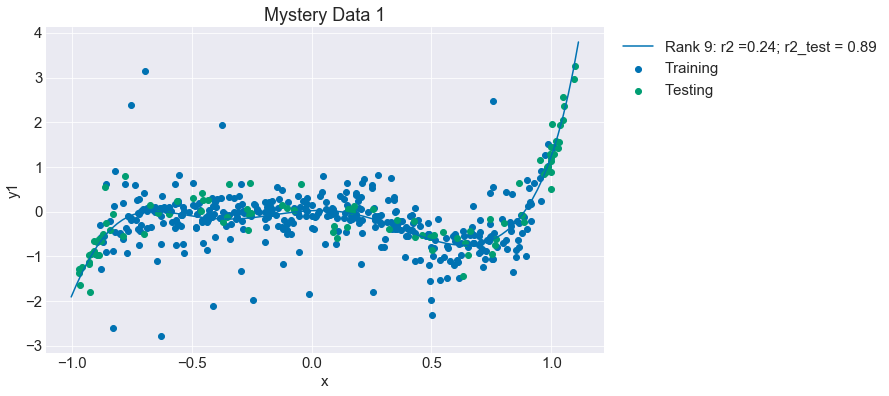

In [9]:
c, res, rnk, s = scipy.linalg.lstsq(Ap[:,:9], y)
res = np.squeeze(res)

E = res
R2 = 1 - E/S

y_pred = ATp[:,:9] @ c
resT = yT - y_pred
ET = np.sum(np.square(resT))
R2T = 1 - ET/ST

ind = lineM_x[:,:9] @ c
plt.plot(line_x, ind, label = "Rank " + str(rnk) + ": r2 =" + str(round(R2, 2)) + "; r2_test = " + str(round(R2T, 2)))

plt.scatter(x, y, label = 'Training')
plt.scatter(xT, yT, label = 'Testing')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title("Mystery Data 1")
plt.xlabel('x')
plt.ylabel('y1')
plt.show()

3. Polynomial degree 8 (Rank 9) is chosen since it has the highest R2_test and relatively high R2 (just smaller than Rank 10), meaning that it fits the original data in a good way and keep the ability of generalization.

## Optional Task 4:  Complete Task 2b and 3 using y2 and the dependent variable

1.  Copy code from Task 2b and modify y and yT to use y2 as the dependent dataset.
1.  Review your results and choose the best polynomial degree.
2.  Copy code from Task 3 and modify y and yT to use y2 as the dependent dataset.
3.  Explain your results, which polynomial degree you chose and why?

## Optional Task 5: Complete Task 2b and 3 using y3 and the dependent variable

1.  Copy code from Task 2b and modify y and yT to use y3 as the dependent dataset.
1.  Review your results and choose the best polynomial degree.
2.  Copy code from Task 3 and modify y and yT to use y3 as the dependent dataset.
3.  Explain your results, which polynomial degree you chose and why?